# BART RSS

=========================================================================================================================

The `bart rss` command is used in BART is used to compute the **Root Sum of Squares (RSS)**: a mathematical technique used to combine multiple values by calculating the square root of the sum of their squared values. It is often used in situations where you need to compute the magnitude of a combined set of values.

Where we can view the full usage string and optional arguments with the `-h` flag.

## BART Command Structure in Python

The `bart` module allows a user to execute any BART command-line tool via the following format:

`<outputs> = bart(<nargs>, <command>, <arguments>, ...)`

Where:

`<outputs>`: the output of a BART command

`<nargs>`: the number of outputs

`<command>`: the command string and necessary flags

`<arguments>`: the `<nargs>` data files passed in for use in the function

## BART Command Structure in Bash

All BART commands are structured in the following way:

`bart` + `command` + `options` + `input/output`

## How `bart rss` Works

The Root Sum of Squares calculation combines data from different coils using the following formula:

$${RSS} = \sqrt{\sum_{i=1}^{N} |S_i|^2} $$

**where:**

- $S_i$ represents the signal from the \(i\)-th coil.
- $ N $ is the total number of coils.
- The absolute value (magnitude) of the signal is squared, summed across all coils, and then the square root of the sum is taken.

This method effectively combines the multi-coil data into a single image, enhancing the overall image quality by taking advantage of the different coil sensitivities.

In [11]:
!bart rss -h

Usage: rss bitmask <input> <output> 

Calculates root of sum of squares along selected dimensions.

-h  help


**where:**

**bitmask**: A bitmask to specify the dimensions along which to perform the Root Sum of Squares. Specifies the dimension along which to combine the coil data.

**input**: The file containing the input multi-coil data.

**output**: The file where the combined RSS result will be saved.


## Example for Matrix (in Bash Kernel)

### Create a Matrix Filled with the Value of 1, Dimension as 2 x 4 x 2

In [12]:
!bart ones 3 2 4 2 matrix 

In [13]:
!bart show matrix # Display the matrix

+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i
+1.000000e+00+0.000000e+00i	+1.000000e+00+0.000000e+00i


### Example 1.1

### Calculates the Rss Across a 0th Dimension and Named as matrix_1

In [14]:
!bart rss $(bart bitmask 0) matrix matrix_1

In [15]:
!bart show matrix_1

+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i
+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i	+1.414214e+00+0.000000e+00i


**We can see the dimension for our new matrix (matrix_1) become 1 x 4 x 2**

In [16]:
!cat matrix_1.hdr

# Dimensions
1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
rss 1 matrix matrix_1 
# Files
 >matrix_1 <matrix
# Creator
BART v0.9.00-454-gc344e9e


### Example 1.2

### Continue to Calculate rss for Matrix_1 along Demension 2

In [17]:
!bart rss $(bart bitmask 2) matrix_1 matrix_2

In [18]:
!bart show matrix_2

+2.000000e+00+0.000000e+00i	+2.000000e+00+0.000000e+00i	+2.000000e+00+0.000000e+00i	+2.000000e+00+0.000000e+00i


In [19]:
!cat matrix_2.hdr

# Dimensions
1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
rss 4 matrix_1 matrix_2 
# Files
 >matrix_2 <matrix_1
# Creator
BART v0.9.00-454-gc344e9e


### Example 1.3

### Calculate the Root Sum of Squares (RSS) Across all Dimensions of a Matrix using BART

In [20]:
!bart rss $(bart bitmask 0 1 2) matrix matrix_3

In [21]:
!bart show matrix_3

+4.000000e+00+0.000000e+00i


In [22]:
!cat matrix_3.hdr

# Dimensions
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
rss 7 matrix matrix_3 
# Files
 >matrix_3 <matrix
# Creator
BART v0.9.00-454-gc344e9e


## Example Workflow for Images (in Python Kernel)

The `bart rss` command in BART is often used to calculate the **Root Sum of Squares (RSS)** across specified dimensions of multi-coil MRI data. This operation is commonly used to combine data from different coils into a single image, enhancing the signal-to-noise ratio (SNR).


In [25]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cfl
from bart import bart

### 1. Generate a multi-coil image using the `phantom` simulation tool in BART:

In [26]:
# Generate a multi-coil image with size 128x128 and 8 coils
multi_coil_image = bart(1, 'phantom -x 128 -s 8').squeeze()

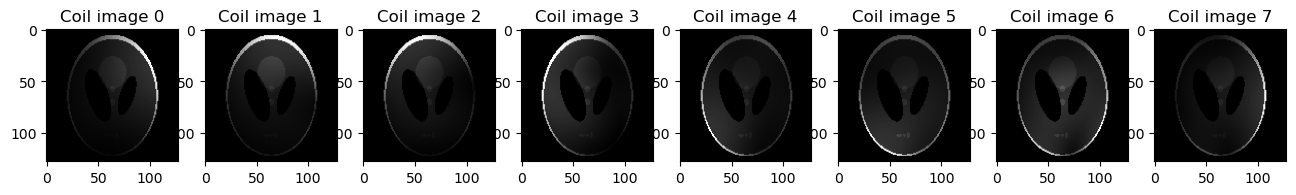

In [27]:
# Visualizing the multi-coil images using Matplotlib 
plt.figure(figsize=(16,20))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(abs(multi_coil_image[:,:,i]), cmap='gray')
    plt.title('Coil image {}'.format(i))

### 2. Combine the Coil Images Using `rss` :

In [28]:
!cat multi_coil_image.hdr

# Dimensions
128 128 1 8 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
phantom -x 128 -s 8 multi_coil_image 
# Files
 >multi_coil_image
# Creator
BART v0.9.00-454-gc344e9e


**The number of coils is located in dimension 3, and the corresponding `bitmask`  for dimension 3 is calculated to be 8**

In [29]:
!bart bitmask 3

8


In [30]:
rss_image = bart(1, 'rss 8 multi_coil_image') # Calculates the rss across coil dimension and named as rss_image

Text(0.5, 1.0, 'rss_image')

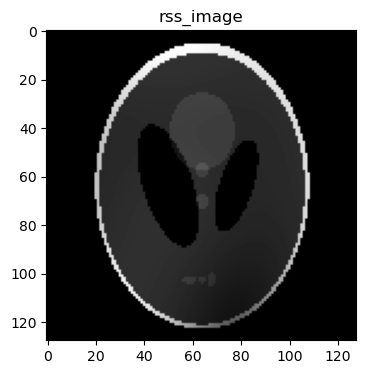

In [31]:
# Visualizing the rss_image using Matplotlib
plt.figure(figsize=(4,6))
plt.imshow(abs(rss_image), cmap='gray')
plt.title('rss_image')